## Checking gene flow from EAS into aGQ

In [46]:
import xlsxwriter as xls


pD="/mnt/solexa/mel_yang/aPlateau/qpadm/"
myfilename="all2.qpadm.full.out"

eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Tu","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tibetan","Sherpa"]
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
selEAS=["Han","Daur","Ami","Dai","Naxi","Yi","Tibetan","Sherpa","Tu"]

newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aNX_S2_aGQ_Target_aNX.xlsx",anx,agq,anx)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ_S2_selEAS_Target_aGQ.xlsx",agq,selEAS,agq)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_selEAS_S2_aGQ_Target_selEAS.xlsx",selEAS,agq,selEAS)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aNX_S2_selEAS_Target_aGQ.xlsx",anx,selEAS,agq)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_selEAS_S2_aGQ_Target_selEAS.xlsx",selEAS,agq,selEAS)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aNX_S2_aGQ_Target_aGQ.xlsx",anx,agq,agq)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_selEAS_Target_aGQ+aNX.xlsx",agq+anx,selEAS,agq+anx)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_EAS_Target_aGQ+aNX.xlsx",agq+anx,eas,agq+anx)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_EAS_S2_aGQ+aNX_Target_EAS.xlsx",eas,agq+anx,eas)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_aGQ+aNX_Target_aGQ+aNX.xlsx",agq+anx,agq+anx,agq+anx)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_aGQ+aNX_Target_EAS.xlsx",agq+anx,agq+anx,eas)


mysets=[(s1,s2,target) for s1 in s1s for s2 in s2s for target in targets]


newfile=xls.Workbook(newfh)
worksheet=newfile.add_worksheet()
notmixture = newfile.add_format({'center_across':True,'bg_color':'#98FB98','num_format':'0.000'}) ##pnest>0.05
mixture = newfile.add_format({'center_across':True,'bg_color':'#B0E0E6','num_format':'0.000'}) ##pnest<0.05
nans = newfile.add_format({'center_across':True,'num_format':'0.000'})
headfont = newfile.add_format({'center_across':True,'bold':True,'num_format':'0.000'})
outs,row=[],0
myfile=open(pD+myfilename,'r')
for line in myfile: 
    if line[0]=="#": outs.append(line.split()[0].split(",")); continue
    x=line.split()
    if x[0]=="outgroup":
        header=x
        worksheet.set_column(1,len(header),7)
        for ind,i in enumerate(x): worksheet.write_string(row,ind,i,headfont)
        continue
    out,s1,s2,target,rank1,rank2,pattern1,ptail1,pattern2,ptail2,pnest,f1,f2,se=tuple(x)
    if (s1,s2,target) not in mysets: continue
    row+=1
    if x[-4]=="NA": 
        for ind,i in enumerate(x): worksheet.write_string(row,ind,i,nans)
        continue
    if float(x[-2])>1 or float(x[-2])<0: 
        x[5:]=["NA" for k in range(5,14)]
        for ind,i in enumerate(x): 
            if ind==4: worksheet.write_number(row,ind,float(i),nans)
            else: worksheet.write_string(row,ind,i,nans)
        continue
    if float(x[-4])<=0.05: myformat=notmixture
    else: myformat=mixture
    for ind,i in enumerate(x): 
        if ind in [4,7,9,10,11,12,13]:
            if i =="-nan": worksheet.write_string(row,ind,i,myformat)
            else: worksheet.write_number(row,ind,float(i),myformat)
        else: worksheet.write_string(row,ind,i,myformat)
newfile.close()        

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors

pD="/mnt/solexa/mel_yang/aPlateau/qpadm/"
myfilename="all2.qpadm.full.out"

eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Tu","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tibetan","Sherpa"]
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
selEAS=["Han","Daur","Ami","Dai","Naxi","Yi","Tibetan","Sherpa","Tu"]

newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_Hejiatai_S2_aGQ+aNX_Target_aGQ+aNX.pdf",["Hejiatai"],agq+anx,agq+anx)
mysets=[(s1,s2,target) for s1 in s1s for s2 in s2s for target in targets]

fixed,v1,v2=s1s,s2s,targets
myary=np.zeros((len(v1),len(v2)))

outs,row=[],0
myfile=open(pD+myfilename,'r')
for line in myfile: 
    if line[0]=="#": outs.append(line.split()[0].split(",")); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    out,s1,s2,target,rank1,rank2,pattern1,ptail1,pattern2,ptail2,pnest,f1,f2,se=tuple(x)
    if (s1,s2,target) not in mysets: continue
    v1ind=v1.index(s2)
    v2ind=v2.index(target)
    row+=1
    if pnest=="NA": myary[v1ind,v2ind]=0; continue
    if float(f2)>1 or float(f2)<0: myary[v1ind,v2ind]=0; continue
    if "-nan" in [rank1,pnest,f1,f2,se]: myary[v1ind,v2ind]=0; continue
    if float(pnest)<=0.05 and min(float(f1),float(f2))-2*float(se)>0: myary[v1ind,v2ind]=2.5; continue
    else: 
        if float(f2)>0.5: myary[v1ind,v2ind]=-3; continue
        else: myary[v1ind,v2ind]=3; continue
    
    #break
print myary

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  0.  0.  0.
   0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -3.  0.  0. -3.  0.  0.  3.  3. -3.  0.  0.  0.  3.  0.  3.  0.  0.
  -3.  3.  0. -3. -3. -3.  3.  0.  0. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  3.  0.  3.  0.  0.  0. -3. -3. -3.  0.  3.  0.  0.  3.
   0.  0.  3.  0. -3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0. -3.  3.  0.  0.  0.  3.  3.  0.  3. -3.  0.  3.  0.
   0.  0.  3.  0. -3.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0

/mnt/solexa/mel_yang/aPlateau/qpadm/qpAdm_V1_S1_aGQ+aNX_S2_aGQ+aNX_Target_Butaxiongqu.png


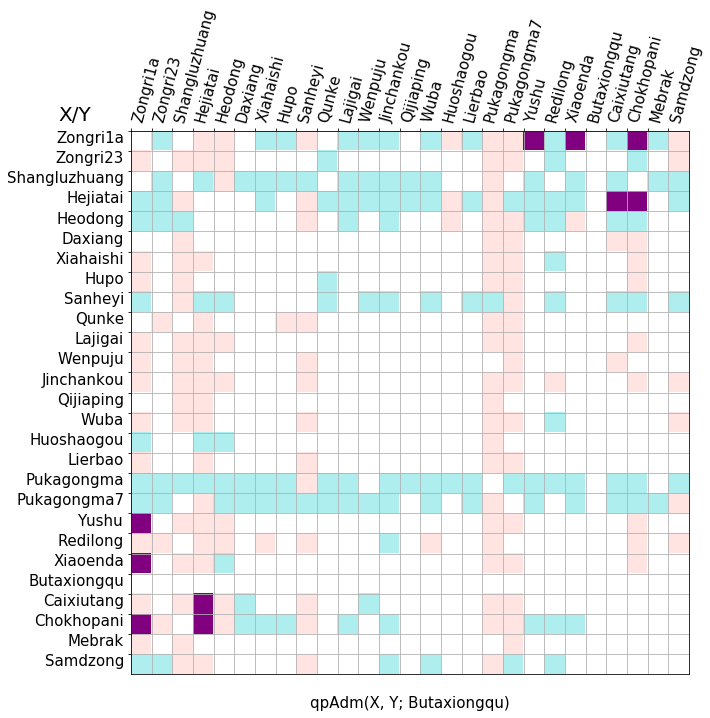

In [5]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
pD="/mnt/solexa/mel_yang/aPlateau/qpadm/"
myfilename="all2.qpadm.full.out"
eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Tu","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tibetan","Sherpa"]
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

onetocheck="Butaxiongqu"
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_Pukagongma_S2_aGQ+aNX_Target_aGQ+aNX.png",["Pukagongma"],agq+anx,agq+anx)
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_aGQ+aNX_Target_Han.png",agq+anx,agq+anx,["Han"])
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_Han_Target_aGQ+aNX.png",agq+anx,["Han"],agq+anx)
newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_aGQ+aNX_Target_%s.png" % onetocheck,agq+anx,agq+anx,[onetocheck])
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_aGQ+aNX_S2_EAS_Target_Redilong.png",agq+anx,eas,["Redilong"])
#newfh,s1s,s2s,targets=(pD+"qpAdm_V1_S1_Pukagongma7_S2_aGQ+aNX_Target_aGQ+aNX.png",["Pukagongma7"],agq+anx,agq+anx)
mysets=[(s1,s2,target) for s1 in s1s for s2 in s2s for target in targets]

#fixed,v1,v2=s1s,s2s,targets
#fixed,v1,v2,indices,labels=targets,s1s,s2s,(1,2),"S1/S2"
#fixed,v1,v2,indices,labels=s2s,s1s,targets,(1,3),"S1/T"
#fixed,v1,v2,indices,labels,title=s1s,s2s,targets,(2,3),"X/Y","\nqpAdm(%s, X; Y)" % s1s[0]
fixed,v1,v2,indices,labels,title=targets,s1s,s2s,(1,2),"X/Y","\nqpAdm(X, Y; %s)" % targets[0]
header1,header2=v1,v2
popA=v1
popB=v2
fs=15
myary=np.zeros((len(v1),len(v2)))

outs,row=[],0
myfile=open(pD+myfilename,'r')
for line in myfile: 
    if line[0]=="#": outs.append(line.split()[0].split(",")); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    out,s1,s2,target,rank1,rank2,pattern1,ptail1,pattern2,ptail2,pnest,f1,f2,se=tuple(x)
    if out=="1": continue
    if (s1,s2,target) not in mysets: continue
    if (s1,s2,target) == ("Zongri1a","Han","Xiahaishi"): print x
    v1ind=v1.index(x[indices[0]])
    v2ind=v2.index(x[indices[1]])
    row+=1
    if pnest=="NA": myary[v1ind,v2ind]=0; continue
    if float(f2)>1 or float(f2)<0: myary[v1ind,v2ind]=0; continue
    if "-nan" in [rank1,pnest,f1,f2,se]: myary[v1ind,v2ind]=0; continue
    if float(pnest)<=0.05 : myary[v1ind,v2ind]=2.5; continue #and min(float(f1),float(f2))-2*float(se)>0
    else: 
        if float(f2)>0.5: myary[v1ind,v2ind]=-5; continue
        else: myary[v1ind,v2ind]=5; continue

for count,myind in enumerate(fixed):
    levels = range(-10,11)
    multiplier=((len(levels)-6)/2)+1
    ##Purple: mixture
    ##light blue: like S1
    ##Light red: like S2
    colors = ['mistyrose']*multiplier + ['purple'] + ['white']*4 + ['purple'] + ['paleturquoise']*multiplier
    cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')
    
    fig,ax = plt.subplots(figsize=(10,10))
    heatmap = ax.pcolor(myary ,cmap=cmap1, vmin=-10,vmax=10)
    #cbar=plt.colorbar(heatmap)
    
    ##LEGEND
    #cbar.ax.text(.5, 0.25, '$D<0$', color='black', ha='center', va='center',fontsize=fs-22)
    #cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-22)
    #cbar.ax.text(.5, 0.75, '$D>0$', color='black', ha='center', va='center',fontsize=fs-22)
    #cbar.ax.get_yaxis().labelpad = 15
    #cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
    
    ax.grid(True)
    ax.set_xticks(np.arange(len(header2)), minor=False)
    ax.set_yticks(np.arange(len(header1)), minor=False)
    
    column_labels = header2
    row_labels = header1
    ax.set_xlabel(title,fontsize=fs)
    ax.set_xlim((0,len(header2)))
    ax.set_ylim((0,len(header1)))
    ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.text(-3.5,-0.5,labels,fontsize=fs+5)
    print newfh
    fig.savefig(newfh)
    
plt.show()
